In [1]:
import sys
import cv2
import platform
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#print("OS:", platform.platform())
print("python:", sys.version)

python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]


### read data

In [3]:
input_path = "./image/turtle.jpg"

In [4]:
bgr_img = cv2.imread(input_path)

### check input data

In [5]:
bgr_img.shape

(1200, 1600, 3)

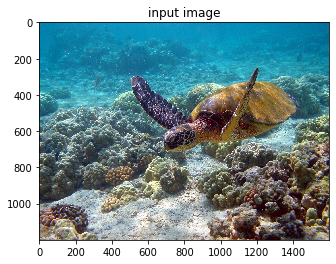

In [6]:
plt.title("input image")
plt.imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB))

### calculate luminance

In [7]:
blue, green, red = cv2.split(bgr_img)

In [8]:
# convert RGB to luminance
luminance = 0.298912 * red + 0.586611 * green + 0.114478 * blue

In [9]:
luminance

array([[ 95.042027,  96.030815,  96.916338, ...,  85.333054,  83.816398,
         83.816398],
       [ 95.754329,  96.042028,  95.92755 , ...,  84.159832,  85.333054,
         86.034143],
       [ 98.352155,  97.352154,  96.75433 , ...,  84.159832,  85.56201 ,
         86.562011],
       ...,
       [112.159062, 118.100325, 123.742676, ..., 174.793645, 175.109786,
        176.895053],
       [124.936465, 128.050946, 129.922249, ..., 191.866626, 192.883856,
        192.842342],
       [138.917391, 138.146346, 136.017645, ..., 199.10981 , 192.783599,
        185.856556]])

### visualise luminance

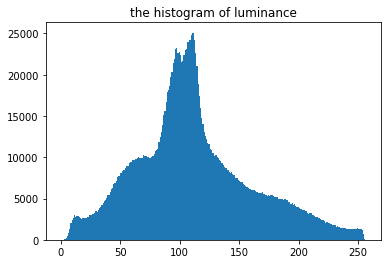

In [10]:
plt.hist(luminance.ravel(),256,[0,256])
plt.title("the histogram of luminance")
plt.show()

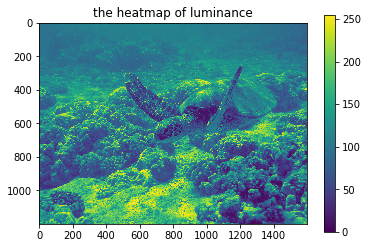

In [11]:
plt.title("the heatmap of luminance")
plt.imshow(luminance)
plt.colorbar()
plt.show()

In [12]:
luminance

array([[ 95.042027,  96.030815,  96.916338, ...,  85.333054,  83.816398,
         83.816398],
       [ 95.754329,  96.042028,  95.92755 , ...,  84.159832,  85.333054,
         86.034143],
       [ 98.352155,  97.352154,  96.75433 , ...,  84.159832,  85.56201 ,
         86.562011],
       ...,
       [112.159062, 118.100325, 123.742676, ..., 174.793645, 175.109786,
        176.895053],
       [124.936465, 128.050946, 129.922249, ..., 191.866626, 192.883856,
        192.842342],
       [138.917391, 138.146346, 136.017645, ..., 199.10981 , 192.783599,
        185.856556]])

In [13]:
xfilter = np.array([-0.5, 0, 0.5])
yfilter = np.array([0.5, 0, -0.5])

In [14]:
luminance[0:1,:]

array([[95.042027, 96.030815, 96.916338, ..., 85.333054, 83.816398,
        83.816398]])

### calculate luminance gradient (on going)

In [15]:
def conv2d(input_nparr, xfilter, yfilter):
    convolved_row_lst = []
    convolved_column_lst = []
    height, width = input_nparr.shape
    transposed_nparr = luminance.transpose()
    for idx in range(height):
        tmp_row = np.squeeze(input_nparr[idx:idx+1,:])
        tmp_row = np.convolve(tmp_row, xfilter)
        convolved_row_lst.append(tmp_row)
        
    for idx in range(width):
        tmp_col = np.squeeze(transposed_nparr[idx:idx+1,:])
        tmp_col = np.convolve(tmp_col, yfilter)
        convolved_column_lst.append(tmp_col)
        
    #np.vstack(output_nparr_lst)   
    return convolved_row_lst, convolved_column_lst 

In [16]:
convolved_row_lst, convolved_column_lst = conv2d(luminance, xfilter, yfilter)

In [17]:
np.vstack(convolved_row_lst).shape

(1200, 1602)

In [18]:
np.vstack(convolved_column_lst).shape

(1600, 1202)